In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
df = pd.read_csv (r'D:\school\Semesters\Fall_2021\Mech_490\Data_Analysis\Raw_data\Phone_drop_T1\Raw Data.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.106458,0.228808,-0.090086,-0.246607,0.348258
1,0.111684,0.201365,-0.100793,-0.204291,0.304043
2,0.116910,0.188698,-0.067925,-0.198831,0.282408
3,0.122136,0.214521,-0.080468,-0.180499,0.291675
4,0.127362,0.195594,-0.083187,-0.158895,0.265377


In [3]:
t=.0055

In [4]:
len(df.index)

1069

Reminder: take the previous row value for calculating displacement

In [5]:
aj=df['Linear Acceleration z (m/s^2)'].cumsum()
aj=aj*2
aj=pd.DataFrame(data=aj)
aj=aj.rename(columns={"Linear Acceleration z (m/s^2)":'aj'})
aj.head()

,aj
0,-0.493214
1,-0.901796
2,-1.299458
3,-1.660456
4,-1.978247


In [6]:
aj.loc[-1] = [0]
aj.index = aj.index + 1
aj.sort_index(inplace=True)
aj=aj.drop([len(df.index)])
aj

,aj
0,0.000000
1,-0.493214
2,-0.901796
3,-1.299458
4,-1.660456
...,...
1064,-377.027567
1065,-375.466333
1066,-375.409199
1067,-376.326000


In [7]:
an=(3/2)*(df['Linear Acceleration z (m/s^2)'])
an=pd.DataFrame(data=an)
an=an.rename(columns={"Linear Acceleration z (m/s^2)":'an'})
an

,an
0,-0.369910
1,-0.306437
2,-0.298246
3,-0.270749
4,-0.238343
...,...
1064,1.170925
1065,0.042851
1066,-0.687601
1067,-1.112789


In [8]:
an1=(1/2)*(df['Linear Acceleration z (m/s^2)'])
an1=pd.DataFrame(data=an1)
an1=an1.rename(columns={"Linear Acceleration z (m/s^2)":'an1'})
an1.index = an1.index -1
an1.sort_index(inplace=True)
an1


,an1
-1,-0.123303
0,-0.102146
1,-0.099415
2,-0.090250
3,-0.079448
...,...
1063,0.390308
1064,0.014284
1065,-0.229200
1066,-0.370930


In [9]:
an1=an1.drop([-1])
new_row={'an1':0}
an1=an1.append(new_row,ignore_index=True)
an1

,an1
0,-0.102146
1,-0.099415
2,-0.090250
3,-0.079448
4,-0.071577
...,...
1064,0.014284
1065,-0.229200
1066,-0.370930
1067,-0.259814


In [10]:
final_df=pd.concat([df,aj,an,an1],axis=1)
final_df

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),aj,an,an1
0,0.106458,0.228808,-0.090086,-0.246607,0.348258,0.000000,-0.369910,-0.102146
1,0.111684,0.201365,-0.100793,-0.204291,0.304043,-0.493214,-0.306437,-0.099415
2,0.116910,0.188698,-0.067925,-0.198831,0.282408,-0.901796,-0.298246,-0.090250
3,0.122136,0.214521,-0.080468,-0.180499,0.291675,-1.299458,-0.270749,-0.079448
4,0.127362,0.195594,-0.083187,-0.158895,0.265377,-1.660456,-0.238343,-0.071577
...,...,...,...,...,...,...,...,...
1064,5.561406,0.026441,-0.166868,0.780617,0.798691,-377.027567,1.170925,0.014284
1065,5.566529,-0.032196,-0.092642,0.028567,0.102153,-375.466333,0.042851,-0.229200
1066,5.571653,-0.017170,-0.010467,-0.458401,0.458842,-375.409199,-0.687601,-0.370930
1067,5.576777,0.027807,0.053352,-0.741859,0.744295,-376.326000,-1.112789,-0.259814


In [11]:
column_list=['aj','an','an1']

In [12]:
sum_of_acceleration=final_df[column_list].sum(axis=1)

In [13]:
final_df['displacement interval']=sum_of_acceleration*((t**2)/2)

In [14]:
#final_df.to_excel(r'D:\school\Semesters\Fall_2021\Mech_490\Data_Analysis\File Name.xlsx', index = False)

displacement_interval_x100=final_df['displacement interval']*100
displacement_interval_x100=pd.DataFrame(data=displacement_interval_x100)
displacement_interval_x100

In [15]:
data=pd.concat([final_df['Time (s)'],final_df['displacement interval']],axis=1)
data.set_index('Time (s)', inplace=True)
data1=pd.concat([final_df['Time (s)'],final_df['Linear Acceleration z (m/s^2)']],axis=1)
data1.set_index('Time (s)', inplace=True)

<AxesSubplot:xlabel='Time (s)', ylabel='Displacement (m)'>

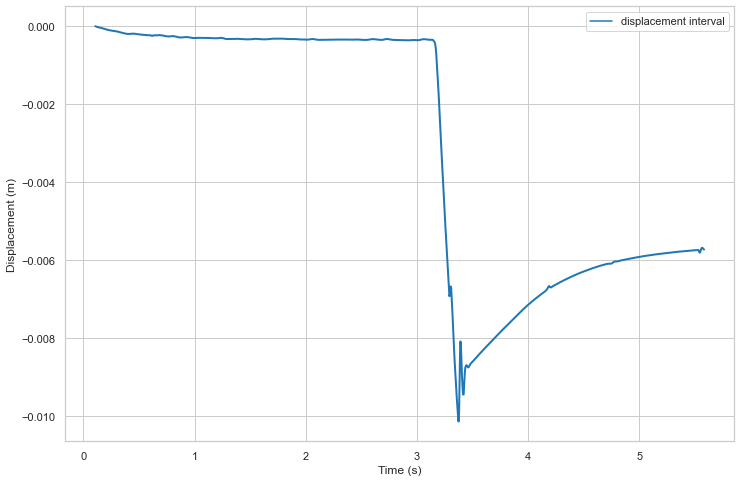

In [17]:
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(12,8))
ax.set(ylabel="Displacement (m)")
sns.lineplot(ax=ax,data=data,palette='tab10',linewidth=2.0)